In [1]:
import sys
sys.path.insert(0, 'pipeline_code')
from mixed_data import create_pipeline
from cross_validation import Stratified10KFoldValidation

In [2]:
import pandas as pd

file = pd.read_csv("datasets/dataset.csv").drop_duplicates()
file

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


In [3]:
import numpy as np
# Definisci la mappatura
mapping = {1: 'NO', 2: 'YES'}

# Applica la mappatura a tutte le colonne del dataframe
for col in file.columns:
    unique_values = np.unique(file[col])
    if sorted(set(unique_values)) == [1, 2]:
        file[col] = file[col].map(mapping)

file

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,NO,NO,NO,YES,YES,NO,YES,YES,YES,YES,YES,YES,NO,NO
1,F,55,NO,YES,YES,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,NO
2,F,78,YES,YES,NO,NO,NO,YES,NO,YES,NO,NO,YES,NO,NO,YES
3,M,60,YES,NO,NO,NO,YES,NO,YES,NO,NO,YES,NO,YES,YES,YES
4,F,80,NO,NO,YES,NO,NO,YES,NO,YES,NO,NO,NO,NO,YES,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,YES,NO,NO,YES,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO
2996,F,75,NO,YES,NO,NO,NO,YES,YES,YES,YES,NO,NO,YES,NO,NO
2997,F,62,YES,YES,YES,NO,YES,YES,YES,YES,NO,NO,YES,YES,YES,YES
2998,M,30,NO,NO,YES,YES,YES,YES,YES,YES,YES,NO,YES,NO,YES,YES


In [4]:
from sklearn.model_selection import train_test_split

data, labels = file.drop(columns=["LUNG_CANCER"]), file.LUNG_CANCER
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=0, stratify=labels)

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((2398, 15), (600, 15), (2398,), (600,))

In [5]:
numeric_features = ['AGE']
categorical_features = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                        'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
                       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
ordinal_columns = {'cat__SMOKING': ['NO', 'YES'],\
                   'cat__YELLOW_FINGERS': ['NO', 'YES'],\
                   'cat__ANXIETY': ['NO', 'YES'],\
                   'cat__PEER_PRESSURE': ['NO', 'YES'],\
                   'cat__CHRONIC_DISEASE': ['NO', 'YES'],\
                   'cat__FATIGUE': ['NO', 'YES'],\
                   'cat__ALLERGY': ['NO', 'YES'],\
                   'cat__WHEEZING': ['NO', 'YES'],\
                   'cat__ALCOHOL_CONSUMING': ['NO', 'YES'],\
                   'cat__COUGHING': ['NO', 'YES'],\
                   'cat__SHORTNESS_OF_BREATH': ['NO', 'YES'],\
                   'cat__SWALLOWING_DIFFICULTY': ['NO', 'YES'],\
                   'cat__CHEST_PAIN': ['NO', 'YES']}

In [6]:
param_grid_RandomForest = {
    "feature_selector__k": range(1, 16),
    
    "model__estimator__max_depth": range(2, 8),
    "model__estimator__criterion": ["gini", "entropy"],
}

param_grid_KNNeighbor = {
    "feature_selector__k": range(1, 16),
    
    "model__n_neighbors": range(3, 18, 2),
}

param_grid_AdaBoostGNB = {
    "feature_selector__k": range(1, 16),
    
    "model__learning_rate": [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
}

param_grid_NeuralNetwork = {
    "feature_selector__k": range(1, 16),
    
    "model__hidden_layer_sizes": [(32,), (32, 32, ), (64,), (64, 64, )],
    "model__activation": ["relu", "logistic"],
    "model__learning_rate": ['adaptive', 'constant']
}

In [7]:
from sklearn.preprocessing import StandardScaler

clf_RandomForest = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        target=labels,
        model="RandomForestClf"
    )

clf_KNNeighbor = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        target=labels,
        model="KNNClf"
    )

clf_AdaBoostGNB = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        target=labels,
        model="AdaBoostGaussianNB"
    )

clf_NeuralNetwork = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        ordinal_columns=ordinal_columns,
        target=labels,
        model="NeuralNetworkClf"
    )

In [8]:
clf_RandomForest

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('cat', 'passthrough',
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('feature_selector', MutualInfoFeatureSelector()),
                ('model',
                 BaggingClassifier(estimator=MixedDecisionTree(),
                                   n_estimators=30, n_jobs=-1,
                                   random_state=0))])

In [9]:
clf_KNNeighbor

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('cat', 'passthrough',
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('feature_selector', MutualInfoFeatureSelector()),
                ('model', MixedKNN())])

In [10]:
clf_AdaBoostGNB

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('cat', 'passthrough',
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('feature_selector', MutualInfoFeatureSelector()),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=MixedGaussianNB(),
                                    n_estimators=30, random_state=0))])

In [11]:
clf_NeuralNetwork

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('cat', 'passthrough',
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN']...
                                                                           'YES'],
                                                       'cat__CHRONIC_DISEASE': ['NO',
                                                                                'YES'],
                                                       'cat__COUGHING': ['NO',
                                                                         'YES'],
                                                       'cat__FATIGUE': ['NO',
                                                                        'YES'],
                                                       'cat__PEER_PRESSURE': ['NO',
                                                                              'YES'],
                                                       'cat__SHORTNESS_OF_BREATH': ['NO',
                                                                                    'YES'],
                                                       'cat__SMOKING': ['NO',
                                                                        'YES'],
                                                       'cat__SWALLOWING_DIFFICULTY': ['NO',
                                                                                      'YES'],
                                                       'cat__WHEEZING': ['NO',
                                                                         'YES'],
                                                       'cat__YELLOW_FINGERS': ['NO',
                                                                               'YES']})),
                ('model', MLPClassifier(random_state=0))])

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
scorer = "accuracy"

              precision    recall  f1-score   support

          NO       0.59      0.63      0.61       118
         YES       0.62      0.58      0.60       122

    accuracy                           0.60       240
   macro avg       0.60      0.60      0.60       240
weighted avg       0.60      0.60      0.60       240

              precision    recall  f1-score   support

          NO       0.59      0.64      0.62       118
         YES       0.62      0.57      0.60       122

    accuracy                           0.61       240
   macro avg       0.61      0.61      0.61       240
weighted avg       0.61      0.61      0.61       240

              precision    recall  f1-score   support

          NO       0.63      0.65      0.64       118
         YES       0.65      0.62      0.64       122

    accuracy                           0.64       240
   macro avg       0.64      0.64      0.64       240
weighted avg       0.64      0.64      0.64       240

              preci

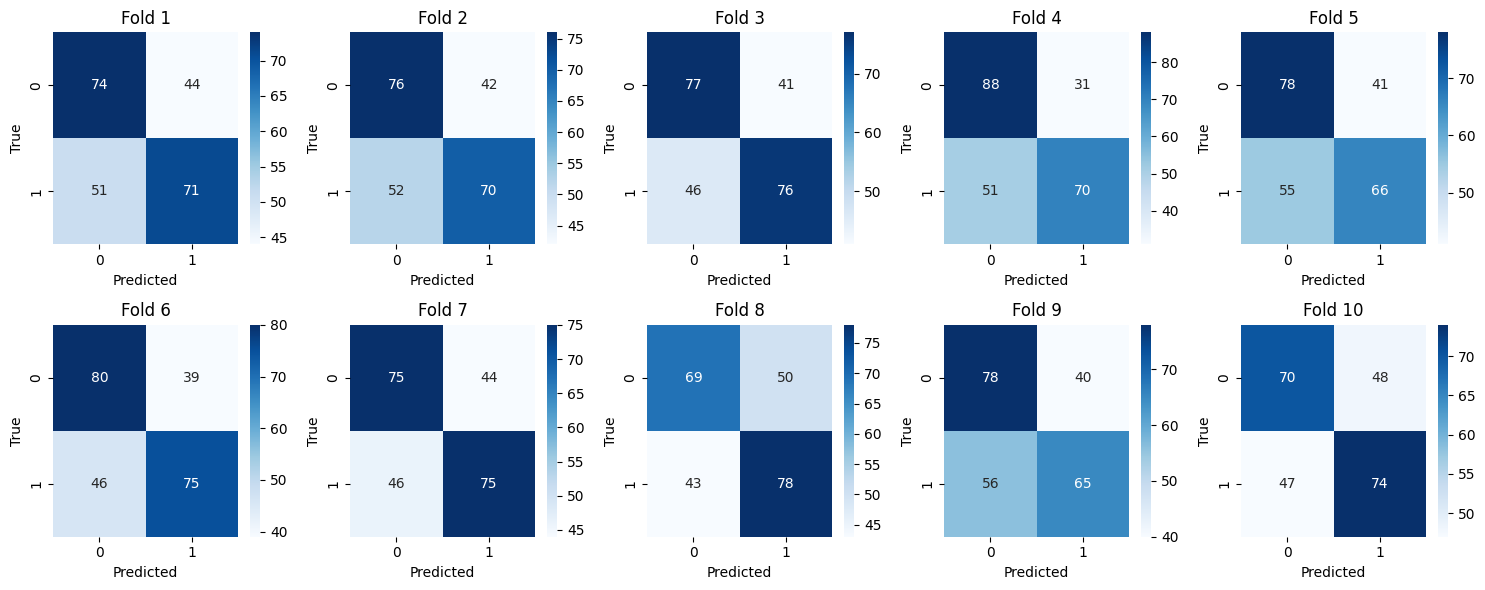

Model best parameters: {'model__estimator__max_depth': 6, 'model__estimator__criterion': 'entropy', 'feature_selector__k': 9}


In [14]:
accuracy_scores1 = []
clfRF, best_params, reports = \
    Stratified10KFoldValidation(clf_RandomForest, param_grid_RandomForest, train_data, train_labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    accuracy_scores1.append(report["accuracy"])

              precision    recall  f1-score   support

          NO       0.51      0.56      0.53       118
         YES       0.53      0.48      0.50       122

    accuracy                           0.52       240
   macro avg       0.52      0.52      0.52       240
weighted avg       0.52      0.52      0.52       240

              precision    recall  f1-score   support

          NO       0.43      0.40      0.41       118
         YES       0.45      0.48      0.47       122

    accuracy                           0.44       240
   macro avg       0.44      0.44      0.44       240
weighted avg       0.44      0.44      0.44       240

              precision    recall  f1-score   support

          NO       0.52      0.55      0.54       118
         YES       0.54      0.52      0.53       122

    accuracy                           0.53       240
   macro avg       0.53      0.53      0.53       240
weighted avg       0.53      0.53      0.53       240

              preci

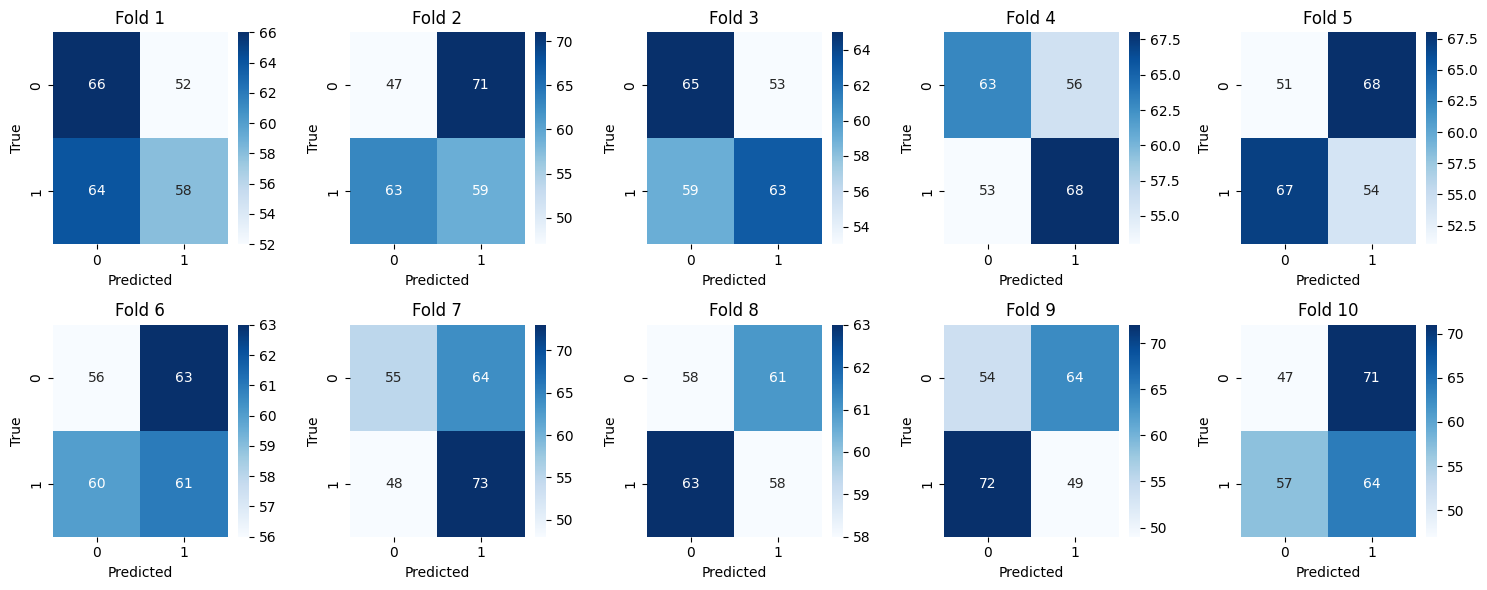

Model best parameters: {'model__n_neighbors': 7, 'feature_selector__k': 2}


In [15]:
accuracy_scores2 = []
clfKNN, best_params, reports = \
    Stratified10KFoldValidation(clf_KNNeighbor, param_grid_KNNeighbor, train_data, train_labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    accuracy_scores2.append(report["accuracy"])

              precision    recall  f1-score   support

          NO       0.53      0.47      0.50       118
         YES       0.54      0.59      0.56       122

    accuracy                           0.53       240
   macro avg       0.53      0.53      0.53       240
weighted avg       0.53      0.53      0.53       240

              precision    recall  f1-score   support

          NO       0.48      0.46      0.47       118
         YES       0.50      0.52      0.51       122

    accuracy                           0.49       240
   macro avg       0.49      0.49      0.49       240
weighted avg       0.49      0.49      0.49       240

              precision    recall  f1-score   support

          NO       0.52      0.48      0.50       118
         YES       0.53      0.57      0.55       122

    accuracy                           0.53       240
   macro avg       0.52      0.52      0.52       240
weighted avg       0.52      0.53      0.52       240

              preci

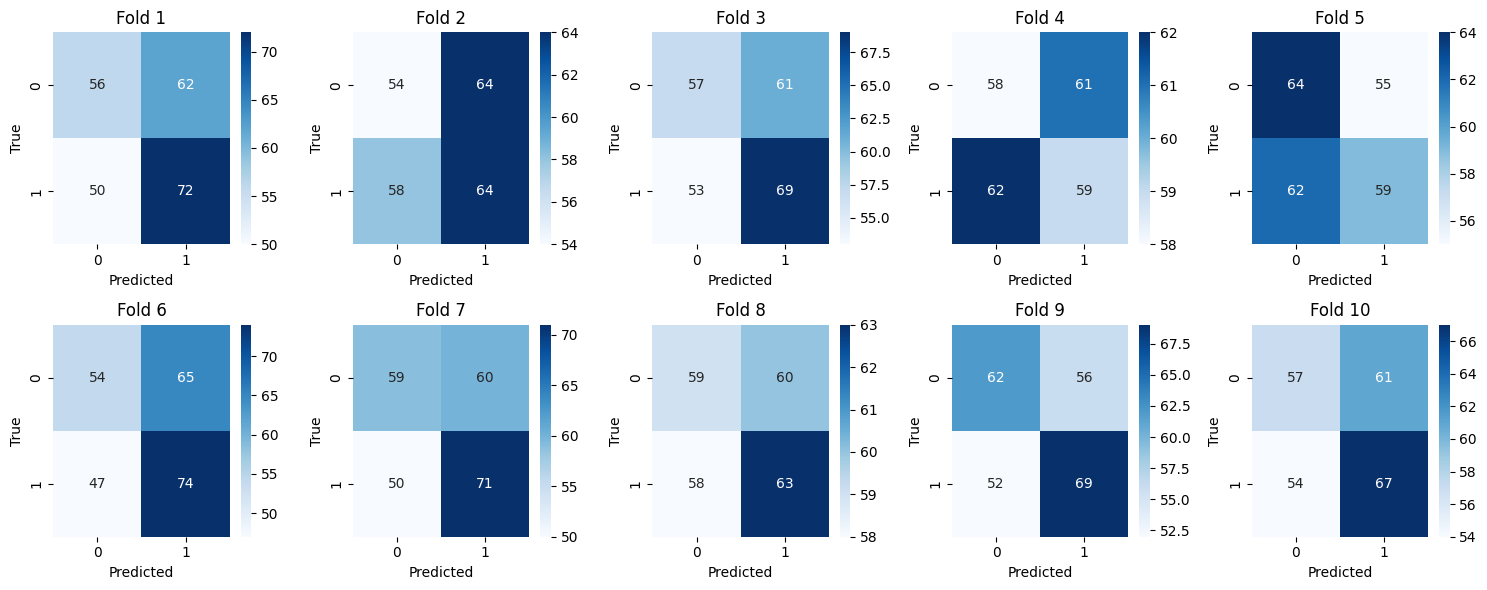

Model best parameters: {'model__learning_rate': 0.8, 'feature_selector__k': 7}


In [16]:
accuracy_scores3 = []
clfADAGNB, best_params, reports = \
    Stratified10KFoldValidation(clf_AdaBoostGNB, param_grid_AdaBoostGNB, train_data, train_labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    accuracy_scores3.append(report["accuracy"])

              precision    recall  f1-score   support

          NO       0.53      0.41      0.46       118
         YES       0.53      0.66      0.59       122

    accuracy                           0.53       240
   macro avg       0.53      0.53      0.52       240
weighted avg       0.53      0.53      0.53       240

              precision    recall  f1-score   support

          NO       0.50      0.47      0.48       118
         YES       0.52      0.55      0.53       122

    accuracy                           0.51       240
   macro avg       0.51      0.51      0.51       240
weighted avg       0.51      0.51      0.51       240

              precision    recall  f1-score   support

          NO       0.54      0.47      0.50       118
         YES       0.55      0.62      0.58       122

    accuracy                           0.55       240
   macro avg       0.55      0.54      0.54       240
weighted avg       0.55      0.55      0.54       240

              preci

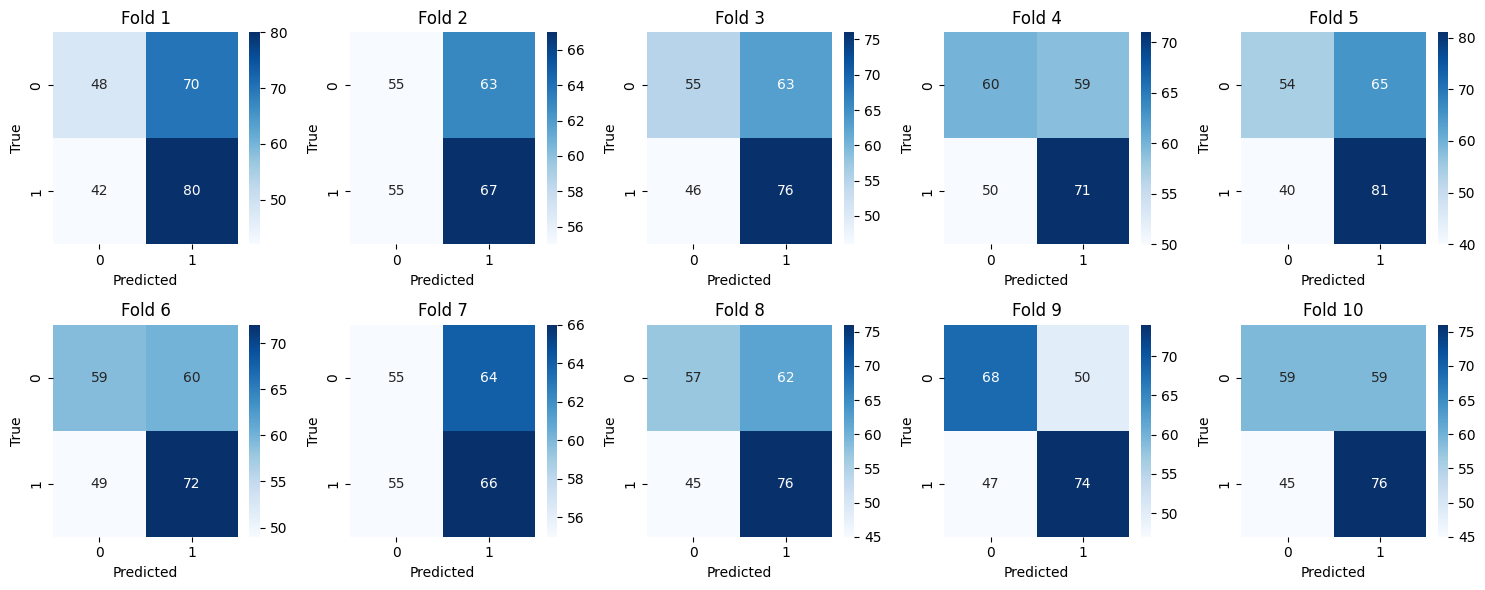

Model best parameters: {'model__learning_rate': 'constant', 'model__hidden_layer_sizes': (64, 64), 'model__activation': 'relu', 'feature_selector__k': 5}


In [17]:
accuracy_scores4 = []
clfNN, best_params, reports = \
    Stratified10KFoldValidation(clf_NeuralNetwork, param_grid_NeuralNetwork, train_data, train_labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    accuracy_scores4.append(report["accuracy"])

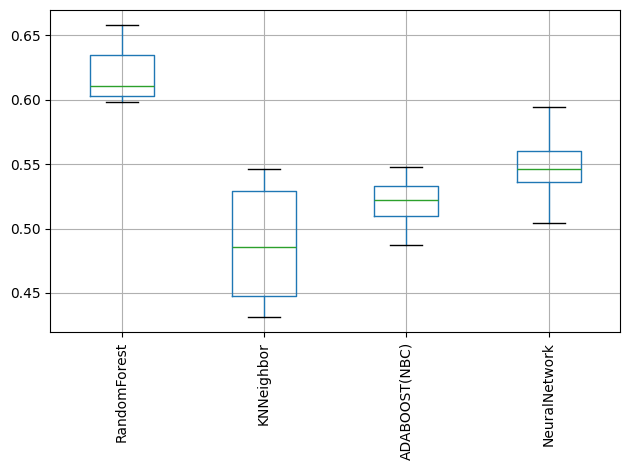

In [18]:
cv_scores = {
    'RandomForest': accuracy_scores1,
    'KNNeighbor': accuracy_scores2,
    'ADABOOST(NBC)': accuracy_scores3,
    'NeuralNetwork': accuracy_scores4
}

df_cv_scores = pd.DataFrame(cv_scores)

df_cv_scores.boxplot()
plt.xticks(ticks=range(1, len(df_cv_scores.columns) + 1), labels=df_cv_scores.columns, rotation=90)
plt.tight_layout()
plt.show()

c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


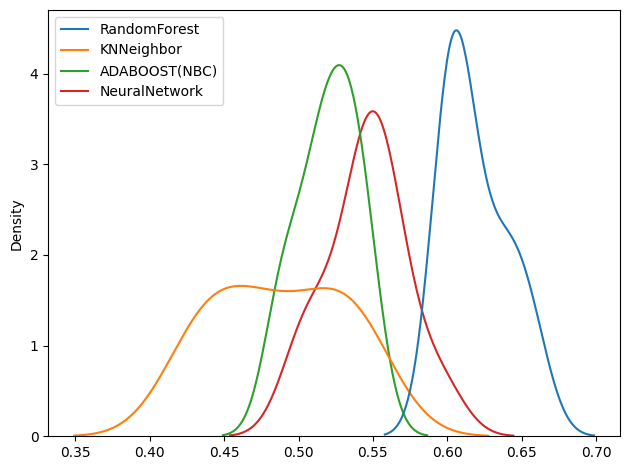

In [19]:
import scipy.stats as stats

sns.kdeplot(data=df_cv_scores)
plt.tight_layout()
plt.show()

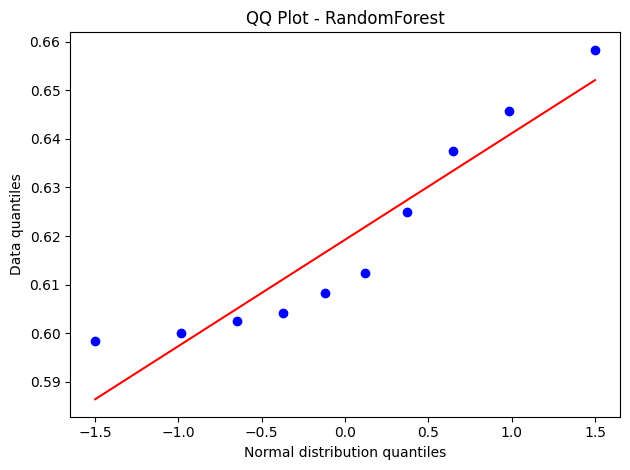

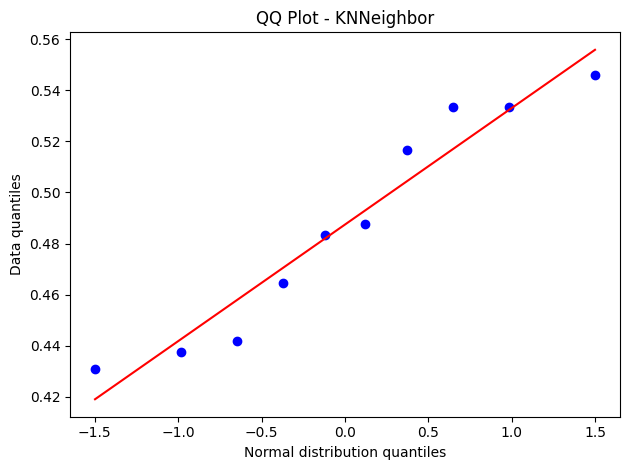

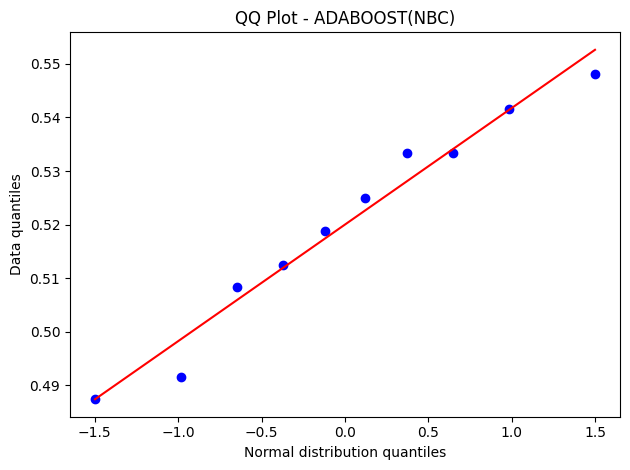

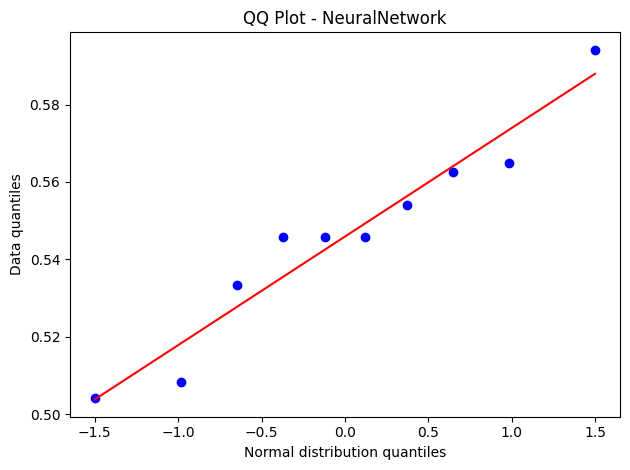

In [20]:
for i, col in enumerate(df_cv_scores.columns):
    stats.probplot(df_cv_scores[col], plot=plt)
    plt.title(f'QQ Plot - {col}')
    plt.xlabel('Normal distribution quantiles')
    plt.ylabel('Data quantiles')
    plt.tight_layout()

    plt.show()

In [21]:
statistic, p_value = stats.levene(cv_scores["RandomForest"], 
                                 cv_scores["KNNeighbor"], 
                                 cv_scores["ADABOOST(NBC)"],
                                 cv_scores["NeuralNetwork"])

print("Levene's statistic:", statistic)
print("p value:", p_value)

if p_value < 0.05:
    print("There is evidence to reject the null hypothesis of equal variances.")
else:
    print("There is no evidence to reject the null hypothesis of equal variances.")

Levene's statistic: 3.172183279256924
p value: 0.03578784193401539
There is evidence to reject the null hypothesis of equal variances.


In [22]:
from scipy.stats import kruskal
from itertools import combinations
from scipy.stats import wilcoxon

kruskal_result = kruskal(cv_scores["RandomForest"], 
                         cv_scores["KNNeighbor"], 
                         cv_scores["ADABOOST(NBC)"],
                         cv_scores["NeuralNetwork"])

print("Kruskal-Wallis statistic:", kruskal_result.statistic)
print("p value:", kruskal_result.pvalue)

if kruskal_result.pvalue < 0.05:
    print("There is a statistically relevant difference between at least two groups.")
    models = ["RandomForest", "KNNeighbor", "ADABOOST(NBC)", "NeuralNetwork"]
    couples = list(combinations(models, 2))
    
    for _ in couples:
        m1, m2 = _
        wilcoxon_result = wilcoxon(cv_scores[m1], cv_scores[m2])
        
        print("Comparing", m1, "and", m2)
        print("Wilcoxon statistic:", wilcoxon_result.statistic)
        print("p value:", wilcoxon_result.pvalue)
        
        if wilcoxon_result.pvalue < 0.05:
            print("There is a statistically relevant difference between", m1, "and", m2)
        else:
            print("There is no statistically relevant difference between", m1, "and", m2)
        print("----")
else:
    print("There are no statistically relevant difference between groups.")

Kruskal-Wallis statistic: 28.069138125705667
p value: 3.5126747644517017e-06
There is a statistically relevant difference between at least two groups.
Comparing RandomForest and KNNeighbor
Wilcoxon statistic: 0.0
p value: 0.001953125
There is a statistically relevant difference between RandomForest and KNNeighbor
----
Comparing RandomForest and ADABOOST(NBC)
Wilcoxon statistic: 0.0
p value: 0.001953125
There is a statistically relevant difference between RandomForest and ADABOOST(NBC)
----
Comparing RandomForest and NeuralNetwork
Wilcoxon statistic: 0.0
p value: 0.001953125
There is a statistically relevant difference between RandomForest and NeuralNetwork
----
Comparing KNNeighbor and ADABOOST(NBC)
Wilcoxon statistic: 9.5
p value: 0.064453125
There is no statistically relevant difference between KNNeighbor and ADABOOST(NBC)
----
Comparing KNNeighbor and NeuralNetwork
Wilcoxon statistic: 3.0
p value: 0.020879263166351643
There is a statistically relevant difference between KNNeighbor a

              precision    recall  f1-score   support

          NO       0.53      0.55      0.54       296
         YES       0.55      0.53      0.54       304

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600



<Axes: >

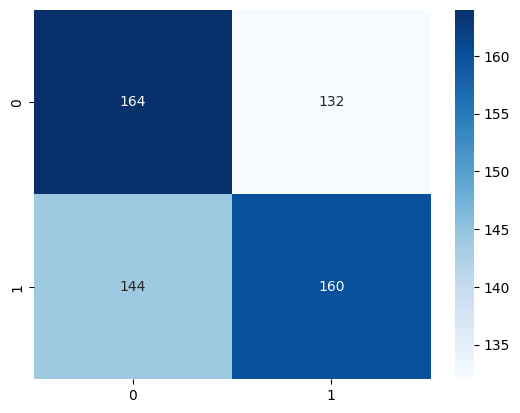

In [23]:
y_pred = clfRF.predict(test_data)

report = classification_report(test_labels, y_pred, output_dict=False)
print(report)

cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')